In [30]:
# import 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np
import scipy
import seaborn as sns

# pathfile
combined_pathfile = "../Data/combined_df.csv"

#read CSV
combined_df = pd.read_csv(combined_pathfile)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_x             965 non-null    int64  
 1   week_x             965 non-null    int64  
 2   home_team_x        965 non-null    object 
 3   away_team_x        965 non-null    object 
 4   winner             965 non-null    object 
 5   tie                3 non-null      object 
 6   day                965 non-null    object 
 7   date               965 non-null    object 
 8   time               965 non-null    object 
 9   pts_win            965 non-null    int64  
 10  pts_loss           965 non-null    int64  
 11  yds_win            965 non-null    int64  
 12  turnovers_win      965 non-null    int64  
 13  yds_loss           965 non-null    int64  
 14  turnovers_loss     965 non-null    int64  
 15  home_team_name     965 non-null    object 
 16  home_team_city_x   965 non

In [31]:
combined_df

,year_x,week_x,home_team_x,away_team_x,winner,tie,day,date,time,pts_win,...,gametime_local,home_team_y,away_team_y,home_score,away_score,OT_flag,arrests,division_game,DateTime,hour
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,7:30:00 PM,Green Bay,New Orleans,42,34,NaN,8.0,n,2011-09-08 19:30:00,19
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,1:05:00 PM,Baltimore,Pittsburgh,35,7,NaN,1.0,y,2011-09-11 13:05:00,13
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,12:00:00 PM,Houston,Indianapolis,34,7,NaN,2.0,y,2011-09-11 12:00:00,12
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,1:00:00 PM,Jacksonville,Tennessee,16,14,NaN,4.0,y,2011-09-11 13:00:00,13
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,12:00:00 PM,Chicago,Atlanta,30,12,NaN,1.0,n,2011-09-11 12:00:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2015,17,San Francisco 49ers,St. Louis Rams,San Francisco 49ers,NaN,Sun,January 3,4:25PM,19,...,1:25:00 PM,San Francisco,St. Louis,19,16,OT,18.0,y,2015-01-03 13:25:00,13
961,2015,17,Carolina Panthers,Tampa Bay Buccaneers,Carolina Panthers,NaN,Sun,January 3,4:25PM,38,...,4:25:00 PM,Carolina,Tampa Bay,38,10,NaN,3.0,y,2015-01-03 16:25:00,16
962,2015,17,Arizona Cardinals,Seattle Seahawks,Seattle Seahawks,NaN,Sun,January 3,4:25PM,36,...,2:25:00 PM,Arizona,Seattle,6,36,NaN,2.0,y,2015-01-03 14:25:00,14
963,2015,17,Kansas City Chiefs,Oakland Raiders,Kansas City Chiefs,NaN,Sun,January 3,4:26PM,23,...,3:25:00 PM,Kansas City,Oakland,23,17,NaN,2.0,y,2015-01-03 15:25:00,15


In [32]:
combined_df = combined_df[["home_team_x", "total", "weekly_attendance", "arrests", "year_x"]]
combined_df

,home_team_x,total,weekly_attendance,arrests,year_x
0,Green Bay Packers,1123023,70555.0,8.0,2011
1,Baltimore Ravens,1083902,71434.0,1.0,2011
2,Houston Texans,1059702,71444.0,2.0,2011
3,Jacksonville Jaguars,1049655,61619.0,4.0,2011
4,Chicago Bears,1053343,62115.0,1.0,2011
...,...,...,...,...,...
960,San Francisco 49ers,1082259,70799.0,18.0,2015
961,Carolina Panthers,1157689,74169.0,3.0,2015
962,Arizona Cardinals,1028446,64646.0,2.0,2015
963,Kansas City Chiefs,1130807,76114.0,2.0,2015


In [33]:
#Corr between total attendance and giving number of arrest
#create a filtered dataframe with the information needed ( year, date, weekly attendance, )
attendance_arrest_df = combined_df.loc[:,['year_x','home_team_x','total','arrests']]

# call to see table
attendance_arrest_df.head(10)

,year_x,home_team_x,total,arrests
0,2011,Green Bay Packers,1123023,8.0
1,2011,Baltimore Ravens,1083902,1.0
2,2011,Houston Texans,1059702,2.0
3,2011,Jacksonville Jaguars,1049655,4.0
4,2011,Chicago Bears,1053343,1.0
5,2011,Kansas City Chiefs,1107206,0.0
6,2011,Tampa Bay Buccaneers,1019250,0.0
7,2011,Arizona Cardinals,1001663,5.0
8,2011,San Diego Chargers,1064892,15.0
9,2011,San Francisco 49ers,1065296,3.0


In [34]:
attendance_arrest_df.info

<bound method DataFrame.info of      year_x           home_team_x    total  arrests
0      2011     Green Bay Packers  1123023      8.0
1      2011      Baltimore Ravens  1083902      1.0
2      2011        Houston Texans  1059702      2.0
3      2011  Jacksonville Jaguars  1049655      4.0
4      2011         Chicago Bears  1053343      1.0
..      ...                   ...      ...      ...
960    2015   San Francisco 49ers  1082259     18.0
961    2015     Carolina Panthers  1157689      3.0
962    2015     Arizona Cardinals  1028446      2.0
963    2015    Kansas City Chiefs  1130807      2.0
964    2015     Green Bay Packers  1147786     11.0

[965 rows x 4 columns]>

In [35]:
mean = attendance_arrest_df.groupby(["home_team_x"])["total"].mean()
median = attendance_arrest_df.groupby(["home_team_x"])["total"].median()
var = attendance_arrest_df.groupby(["home_team_x"])["total"].var()
std = attendance_arrest_df.groupby(["home_team_x"])["total"].std()
sem = attendance_arrest_df.groupby(["home_team_x"])["total"].sem()

summary_stat = pd.DataFrame({"Mean Total Attendance":mean, 
                            "Median Total Attendance":median, 
                           "Total Attendance Variance":var, 
                           "Total Attendance Std. Dev.":std, 
                           "Total Attendance Std. Err.":sem})



In [36]:
summary_stat

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Arizona Cardinals,1.021877e+06,1028241.0,4.236598e+08,20582.997927,3254.457726
Baltimore Ravens,1.092057e+06,1083919.0,8.532155e+07,9236.966662,1659.008187
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276
Chicago Bears,1.054312e+06,1054902.5,7.423625e+06,2724.632914,481.651602
Cincinnati Bengals,9.999018e+05,1021414.0,1.602862e+09,40035.759198,6330.209346
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Houston Texans,1.100431e+06,1103683.0,5.063028e+08,22501.173864,3557.747972


In [37]:
summary_stat

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Arizona Cardinals,1.021877e+06,1028241.0,4.236598e+08,20582.997927,3254.457726
Baltimore Ravens,1.092057e+06,1083919.0,8.532155e+07,9236.966662,1659.008187
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276
Chicago Bears,1.054312e+06,1054902.5,7.423625e+06,2724.632914,481.651602
Cincinnati Bengals,9.999018e+05,1021414.0,1.602862e+09,40035.759198,6330.209346
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Houston Texans,1.100431e+06,1103683.0,5.063028e+08,22501.173864,3557.747972


In [38]:
Summary_Stat_df = summary_stat

In [39]:
Summary_Stat_df

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Arizona Cardinals,1.021877e+06,1028241.0,4.236598e+08,20582.997927,3254.457726
Baltimore Ravens,1.092057e+06,1083919.0,8.532155e+07,9236.966662,1659.008187
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276
Chicago Bears,1.054312e+06,1054902.5,7.423625e+06,2724.632914,481.651602
Cincinnati Bengals,9.999018e+05,1021414.0,1.602862e+09,40035.759198,6330.209346
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Houston Texans,1.100431e+06,1103683.0,5.063028e+08,22501.173864,3557.747972


In [40]:
Summary_Stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Arizona Cardinals to Washington Redskins
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mean Total Attendance       25 non-null     float64
 1   Median Total Attendance     25 non-null     float64
 2   Total Attendance Variance   25 non-null     float64
 3   Total Attendance Std. Dev.  25 non-null     float64
 4   Total Attendance Std. Err.  25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [41]:
mean_attendance = Summary_Stat_df["Mean Total Attendance"]
mean_attendance

home_team_x
Arizona Cardinals       1.021877e+06
Baltimore Ravens        1.092057e+06
Carolina Panthers       1.120055e+06
Chicago Bears           1.054312e+06
Cincinnati Bengals      9.999018e+05
Dallas Cowboys          1.286886e+06
Denver Broncos          1.152036e+06
Green Bay Packers       1.143337e+06
Houston Texans          1.100431e+06
Indianapolis Colts      1.067352e+06
Jacksonville Jaguars    1.041657e+06
Kansas City Chiefs      1.103992e+06
Miami Dolphins          1.066352e+06
New England Patriots    1.123702e+06
New York Giants         1.213030e+06
New York Jets           1.173521e+06
Oakland Raiders         9.953358e+05
Philadelphia Eagles     1.141110e+06
Pittsburgh Steelers     1.053023e+06
San Diego Chargers      1.053077e+06
San Francisco 49ers     1.097730e+06
Seattle Seahawks        1.077469e+06
Tampa Bay Buccaneers    1.021050e+06
Tennessee Titans        1.069686e+06
Washington Redskins     1.184689e+06
Name: Mean Total Attendance, dtype: float64

Text(0.5, 1.0, 'Averge Attendance Per Team')

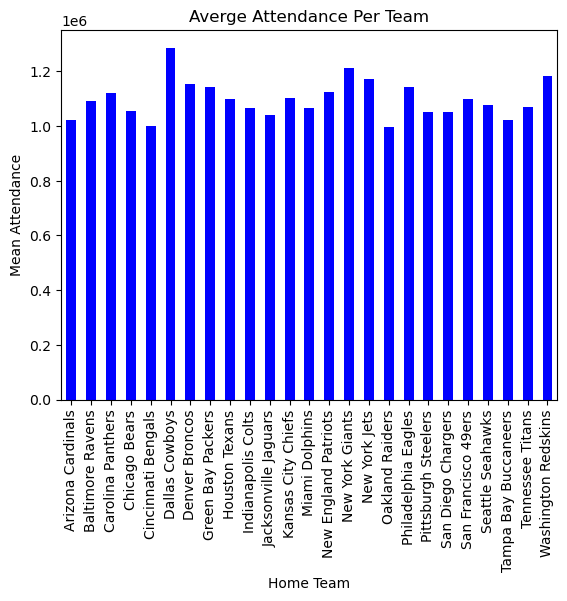

In [42]:
plot_pandas = mean_attendance.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Home Team")
plt.ylabel("Mean Attendance")
plt.title("Averge Attendance Per Team")



In [43]:
Summary_Stat_df

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Arizona Cardinals,1.021877e+06,1028241.0,4.236598e+08,20582.997927,3254.457726
Baltimore Ravens,1.092057e+06,1083919.0,8.532155e+07,9236.966662,1659.008187
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276
Chicago Bears,1.054312e+06,1054902.5,7.423625e+06,2724.632914,481.651602
Cincinnati Bengals,9.999018e+05,1021414.0,1.602862e+09,40035.759198,6330.209346
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Houston Texans,1.100431e+06,1103683.0,5.063028e+08,22501.173864,3557.747972


In [44]:
Summary_Stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Arizona Cardinals to Washington Redskins
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mean Total Attendance       25 non-null     float64
 1   Median Total Attendance     25 non-null     float64
 2   Total Attendance Variance   25 non-null     float64
 3   Total Attendance Std. Dev.  25 non-null     float64
 4   Total Attendance Std. Err.  25 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB


In [45]:
Summary_Stat_df.sort_values(by = ['Mean Total Attendance'], ascending=False)

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
New York Giants,1.213030e+06,1209532.0,2.454550e+08,15667.002358,2477.170578
Washington Redskins,1.184689e+06,1189702.0,2.282830e+08,15109.036109,2388.948368
New York Jets,1.173521e+06,1169108.0,5.248963e+08,22910.615381,3668.634544
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Philadelphia Eagles,1.141110e+06,1141155.0,1.407204e+08,11862.562051,1875.635748
New England Patriots,1.123702e+06,1120817.0,1.039884e+08,10197.471333,1612.361789
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276


In [46]:
Summary_Stat2_df.sort_values(by = ['Mean Arrests'], ascending=False)

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
San Diego Chargers,24.575000,19.0,211.891667,14.556499,2.301585
New York Giants,22.475000,21.5,79.640385,8.924146,1.411031
New York Jets,21.717949,22.0,74.102564,8.608285,1.378429
Oakland Raiders,17.783784,17.0,59.285285,7.699694,1.265822
Pittsburgh Steelers,16.750000,13.5,159.474359,12.628316,1.996712
San Francisco 49ers,11.350000,6.5,106.643590,10.326838,1.632817
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
New England Patriots,4.700000,4.0,9.292308,3.048329,0.481983
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347


In [47]:
atten_df = Summary_Stat_df.sort_values(by = ['Mean Total Attendance'], ascending=False)

In [48]:
atten_df

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.
home_team_x,,,,,
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606
New York Giants,1.213030e+06,1209532.0,2.454550e+08,15667.002358,2477.170578
Washington Redskins,1.184689e+06,1189702.0,2.282830e+08,15109.036109,2388.948368
New York Jets,1.173521e+06,1169108.0,5.248963e+08,22910.615381,3668.634544
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427
Philadelphia Eagles,1.141110e+06,1141155.0,1.407204e+08,11862.562051,1875.635748
New England Patriots,1.123702e+06,1120817.0,1.039884e+08,10197.471333,1612.361789
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276


In [49]:
#find mean, median, var, std, sem
mean = attendance_arrest_df.groupby(["home_team_x"])["arrests"].mean()
median = attendance_arrest_df.groupby(["home_team_x"])["arrests"].median()
var = attendance_arrest_df.groupby(["home_team_x"])["arrests"].var()
std = attendance_arrest_df.groupby(["home_team_x"])["arrests"].std()
sem = attendance_arrest_df.groupby(["home_team_x"])["arrests"].sem()

summary_stat2 = pd.DataFrame({"Mean Arrests":mean, 
                            "Median Arrests":median, 
                           "Arrests Variance":var, 
                           "Arrests Std. Dev.":std, 
                           "Arrests Std. Err.":sem})


In [50]:
#Diplay Summary stat
summary_stat2

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
Arizona Cardinals,4.150000,4.0,7.207692,2.684715,0.424491
Baltimore Ravens,1.483871,0.0,4.924731,2.219174,0.398575
Carolina Panthers,1.375000,1.0,2.701923,1.643753,0.259900
Chicago Bears,0.812500,1.0,0.737903,0.859013,0.151853
Cincinnati Bengals,1.425000,1.0,4.096795,2.024054,0.320031
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347
Denver Broncos,2.625000,2.0,7.317308,2.705052,0.427706
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
Houston Texans,1.000000,1.0,1.538462,1.240347,0.196116


In [51]:
summary_stat2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Arizona Cardinals to Washington Redskins
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mean Arrests       25 non-null     float64
 1   Median Arrests     25 non-null     float64
 2   Arrests Variance   25 non-null     float64
 3   Arrests Std. Dev.  25 non-null     float64
 4   Arrests Std. Err.  25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [52]:
Summary_Stat2_df = summary_stat2

In [53]:
Summary_Stat2_df

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
Arizona Cardinals,4.150000,4.0,7.207692,2.684715,0.424491
Baltimore Ravens,1.483871,0.0,4.924731,2.219174,0.398575
Carolina Panthers,1.375000,1.0,2.701923,1.643753,0.259900
Chicago Bears,0.812500,1.0,0.737903,0.859013,0.151853
Cincinnati Bengals,1.425000,1.0,4.096795,2.024054,0.320031
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347
Denver Broncos,2.625000,2.0,7.317308,2.705052,0.427706
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
Houston Texans,1.000000,1.0,1.538462,1.240347,0.196116


In [54]:
Summary_Stat2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Arizona Cardinals to Washington Redskins
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mean Arrests       25 non-null     float64
 1   Median Arrests     25 non-null     float64
 2   Arrests Variance   25 non-null     float64
 3   Arrests Std. Dev.  25 non-null     float64
 4   Arrests Std. Err.  25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [55]:
mean_arrest = Summary_Stat2_df["Mean Arrests"]
mean_arrest

home_team_x
Arizona Cardinals        4.150000
Baltimore Ravens         1.483871
Carolina Panthers        1.375000
Chicago Bears            0.812500
Cincinnati Bengals       1.425000
Dallas Cowboys           4.225000
Denver Broncos           2.625000
Green Bay Packers        7.200000
Houston Texans           1.000000
Indianapolis Colts       2.275000
Jacksonville Jaguars     1.729730
Kansas City Chiefs       1.820513
Miami Dolphins           2.387097
New England Patriots     4.700000
New York Giants         22.475000
New York Jets           21.717949
Oakland Raiders         17.783784
Philadelphia Eagles      3.150000
Pittsburgh Steelers     16.750000
San Diego Chargers      24.575000
San Francisco 49ers     11.350000
Seattle Seahawks         0.800000
Tampa Bay Buccaneers     0.846154
Tennessee Titans         2.075000
Washington Redskins      2.675000
Name: Mean Arrests, dtype: float64

Text(0.5, 1.0, 'Averge Arrests Per Team')

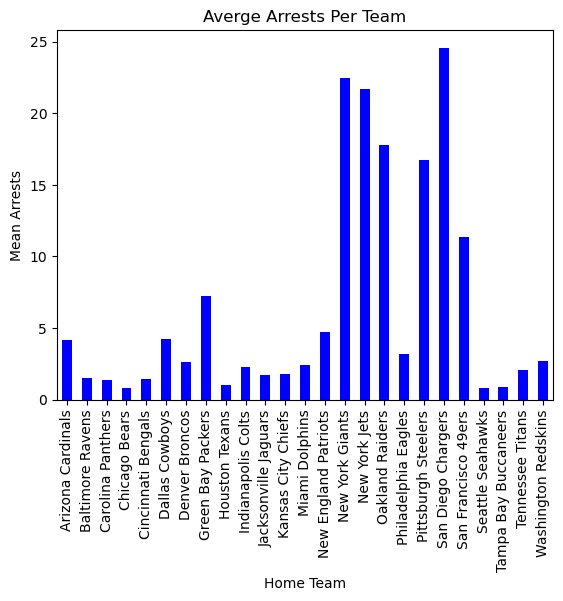

In [56]:
plot_pandas = mean_arrest.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Home Team")
plt.ylabel("Mean Arrests")
plt.title("Averge Arrests Per Team")

In [57]:
Summary_Stat2_df

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
Arizona Cardinals,4.150000,4.0,7.207692,2.684715,0.424491
Baltimore Ravens,1.483871,0.0,4.924731,2.219174,0.398575
Carolina Panthers,1.375000,1.0,2.701923,1.643753,0.259900
Chicago Bears,0.812500,1.0,0.737903,0.859013,0.151853
Cincinnati Bengals,1.425000,1.0,4.096795,2.024054,0.320031
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347
Denver Broncos,2.625000,2.0,7.317308,2.705052,0.427706
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
Houston Texans,1.000000,1.0,1.538462,1.240347,0.196116


In [58]:
Summary_Stat2_df.sort_values(by = ['Mean Arrests'], ascending=False)

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
San Diego Chargers,24.575000,19.0,211.891667,14.556499,2.301585
New York Giants,22.475000,21.5,79.640385,8.924146,1.411031
New York Jets,21.717949,22.0,74.102564,8.608285,1.378429
Oakland Raiders,17.783784,17.0,59.285285,7.699694,1.265822
Pittsburgh Steelers,16.750000,13.5,159.474359,12.628316,1.996712
San Francisco 49ers,11.350000,6.5,106.643590,10.326838,1.632817
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
New England Patriots,4.700000,4.0,9.292308,3.048329,0.481983
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347


In [59]:
arr_df = Summary_Stat2_df.sort_values(by = ['Mean Arrests'], ascending=False)

In [60]:
arr_df

,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,
San Diego Chargers,24.575000,19.0,211.891667,14.556499,2.301585
New York Giants,22.475000,21.5,79.640385,8.924146,1.411031
New York Jets,21.717949,22.0,74.102564,8.608285,1.378429
Oakland Raiders,17.783784,17.0,59.285285,7.699694,1.265822
Pittsburgh Steelers,16.750000,13.5,159.474359,12.628316,1.996712
San Francisco 49ers,11.350000,6.5,106.643590,10.326838,1.632817
Green Bay Packers,7.200000,6.0,26.625641,5.160004,0.815868
New England Patriots,4.700000,4.0,9.292308,3.048329,0.481983
Dallas Cowboys,4.225000,3.0,19.563462,4.423060,0.699347


In [61]:
merged_df = pd.merge(atten_df, arr_df, left_index=True, right_index=True)
merged_df

,Mean Total Attendance,Median Total Attendance,Total Attendance Variance,Total Attendance Std. Dev.,Total Attendance Std. Err.,Mean Arrests,Median Arrests,Arrests Variance,Arrests Std. Dev.,Arrests Std. Err.
home_team_x,,,,,,,,,,
Dallas Cowboys,1.286886e+06,1290328.0,3.156893e+08,17767.646663,2809.311606,4.225000,3.0,19.563462,4.423060,0.699347
New York Giants,1.213030e+06,1209532.0,2.454550e+08,15667.002358,2477.170578,22.475000,21.5,79.640385,8.924146,1.411031
Washington Redskins,1.184689e+06,1189702.0,2.282830e+08,15109.036109,2388.948368,2.675000,2.0,4.327564,2.080280,0.328921
New York Jets,1.173521e+06,1169108.0,5.248963e+08,22910.615381,3668.634544,21.717949,22.0,74.102564,8.608285,1.378429
Denver Broncos,1.152036e+06,1156767.0,7.654734e+08,27667.189606,4374.566780,2.625000,2.0,7.317308,2.705052,0.427706
Green Bay Packers,1.143337e+06,1147786.0,8.486004e+08,29130.746393,4605.975427,7.200000,6.0,26.625641,5.160004,0.815868
Philadelphia Eagles,1.141110e+06,1141155.0,1.407204e+08,11862.562051,1875.635748,3.150000,2.0,11.874359,3.445919,0.544848
New England Patriots,1.123702e+06,1120817.0,1.039884e+08,10197.471333,1612.361789,4.700000,4.0,9.292308,3.048329,0.481983
Carolina Panthers,1.120055e+06,1112229.0,4.274080e+08,20673.847318,3268.822276,1.375000,1.0,2.701923,1.643753,0.259900


In [62]:
clean_df = merged_df.loc[:,["Mean Total Attendance","Mean Arrests"]]

# call to see table
clean_df.head(10)

,Mean Total Attendance,Mean Arrests
home_team_x,,
Dallas Cowboys,1.286886e+06,4.225000
New York Giants,1.213030e+06,22.475000
Washington Redskins,1.184689e+06,2.675000
New York Jets,1.173521e+06,21.717949
Denver Broncos,1.152036e+06,2.625000
Green Bay Packers,1.143337e+06,7.200000
Philadelphia Eagles,1.141110e+06,3.150000
New England Patriots,1.123702e+06,4.700000
Carolina Panthers,1.120055e+06,1.375000


In [63]:
sns.violinplot(clean_df, x="home_team_x", y="Mean Total Attendance", hue="team", split=True)
plt.title("Violin Plot of Tumor Volume")
plt.show()

ValueError: Could not interpret input 'home_team_x'

In [ ]:
MTA = ["Mean Total Attendance"]
MA = ["Mean Arrests"]
index = ["home_team_x"]
clean_df = pd.DataFrame({'MTA': Mean Total Attendance,'MA': Mean Arrests}, index=index)
ax = df.plot.bar(rot=0)